![](https://github.com/GabrielTrentino/Projetos-de-Cursos/blob/master/03-DSNP/00%20-%20Imagens/06-Covid.png?raw=true)
# Panorama do COVID-19: Mundial e no Brasil.

# Obtenção dos Dados:

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# configurar a visualização
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Importando os dados do COVID-19:

In [28]:
url_covid_mundo = 'https://raw.githubusercontent.com/GabrielTrentino/Projetos-de-Cursos/master/03-DSNP/06-dados-covid-mundo.csv'
df_mundo = pd.read_csv(url_covid_mundo)
df_mundo.date = pd.to_datetime(df_mundo.date)
df_mundo.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,0.0,0.0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
1,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.0,0.0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
2,ABW,North America,Aruba,2020-03-24,12.0,8.0,0.0,0.0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
3,ABW,North America,Aruba,2020-03-25,17.0,5.0,0.0,0.0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
4,ABW,North America,Aruba,2020-03-26,19.0,2.0,0.0,0.0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29


## Dicionário do Data Set:

*   iso_code  - 
*   continent  - 
*   location  - 
*   date  - 
*   total_cases  - 
*   new_cases  - 
*   total_deaths  - 
*   new_deaths  - 
*   total_cases_per_million  - 
*   new_cases_per_million  - 
*   total_deaths_per_million  - 
*   new_deaths_per_million  - 
*   new_tests  - 
*   total_tests  - 
*   total_tests_per_thousand  - 
*   new_tests_per_thousand  - 
*   new_tests_smoothed  - 
*   new_tests_smoothed_per_thousand  - 
*   tests_per_case  - 
*   positive_rate  - 
*   tests_units  - 
*   stringency_index  - 
*   population  - 
*   population_density  - 
*   median_age  - 
*   aged_65_older  - 
*   aged_70_older  - 
*   gdp_per_capita  - 
*   extreme_poverty  - 
*   cardiovasc_death_rate  - 
*   diabetes_prevalence  - 
*   female_smokers  - 
*   male_smokers  - 
*   handwashing_facilities  - 
*   hospital_beds_per_thousand  - 
*   life_expectancy  - 

## Análise da estrutura do Data Set:

Ver quantidade de linhas, colunas, tipos das variáveis e dados vazios:

### Linhas e Colunas:

In [29]:
print('Nesse Data Set há: {} linhas e {} colunas'.format(df_mundo.shape[0], df_mundo.shape[1]))

Nesse Data Set há: 35083 linhas e 36 colunas


### Tipos das Variáveis:

In [30]:
df_mundo.dtypes

iso_code                                   object
continent                                  object
location                                   object
date                               datetime64[ns]
total_cases                               float64
new_cases                                 float64
total_deaths                              float64
new_deaths                                float64
total_cases_per_million                   float64
new_cases_per_million                     float64
total_deaths_per_million                  float64
new_deaths_per_million                    float64
new_tests                                 float64
total_tests                               float64
total_tests_per_thousand                  float64
new_tests_per_thousand                    float64
new_tests_smoothed                        float64
new_tests_smoothed_per_thousand           float64
tests_per_case                            float64
positive_rate                             float64


### Valores Nulos:

In [31]:
((df_mundo.isnull().sum().sort_values(ascending=False)/df_mundo.shape[0])*100).round(2)

new_tests_per_thousand             68.71
new_tests                          68.71
total_tests_per_thousand           67.69
total_tests                        67.69
tests_per_case                     67.14
positive_rate                      66.15
new_tests_smoothed                 64.74
new_tests_smoothed_per_thousand    64.74
tests_units                        62.62
handwashing_facilities             58.67
extreme_poverty                    40.58
male_smokers                       29.57
female_smokers                     28.71
stringency_index                   19.34
hospital_beds_per_thousand         18.25
aged_65_older                      11.39
gdp_per_capita                     11.19
aged_70_older                      10.54
median_age                         10.08
cardiovasc_death_rate               9.99
diabetes_prevalence                 6.98
population_density                  4.55
life_expectancy                     1.40
new_deaths_per_million              1.15
total_deaths_per

# Análise Exploratória:

## Distribuição dos dados numéricos:

In [33]:
df_mundo.describe().round(2)

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,34742.00,34742.00,34742.00,34742.00,34678.00,34678.00,34678.00,34678.00,10977.00,11336.00,11336.00,10977.00,12372.00,12372.00,11530.00,11874.00,28298.00,3.501900e+04,33488.00,31548.00,31088.00,31385.00,31158.00,20848.00,31577.00,32634.00,25011.00,24709.00,14500.00,28679.00,34593.00
mean,56663.60,1081.89,2843.70,40.74,1192.62,18.55,43.13,0.54,17625.31,885070.40,35.44,0.61,16732.95,0.58,206.31,0.06,58.19,9.348897e+07,362.57,31.58,9.42,5.97,21432.85,11.59,249.80,8.04,10.97,32.63,53.10,3.14,74.20
std,579829.60,10019.14,26895.96,352.50,2831.24,62.90,126.02,2.99,64964.87,3553070.47,64.14,1.13,59424.90,1.01,1039.88,0.09,29.43,6.333664e+08,1664.36,9.01,6.37,4.36,20666.86,18.82,117.87,4.12,10.50,13.34,31.49,2.54,7.33
min,0.00,-2461.00,0.00,-1918.00,0.00,-265.19,0.00,-41.02,-3743.00,1.00,0.00,-0.40,0.00,0.00,1.31,0.00,0.00,8.090000e+02,0.14,15.10,1.14,0.53,661.24,0.10,79.37,0.99,0.10,7.70,1.19,0.10,53.28
25%,24.00,0.00,0.00,0.00,10.17,0.00,0.00,0.00,839.00,30022.75,1.80,0.06,950.00,0.06,12.12,0.01,38.89,1.701583e+06,39.50,24.30,3.61,2.16,5819.50,0.50,153.49,5.31,1.90,21.40,22.86,1.38,70.39
50%,509.00,6.00,10.00,0.00,180.62,0.88,2.43,0.00,2908.00,125981.50,10.04,0.25,3292.00,0.27,35.29,0.03,66.67,8.655541e+06,90.67,31.60,7.10,4.46,14600.86,1.70,235.95,7.11,6.43,31.40,55.18,2.54,75.80
75%,5914.75,112.00,117.00,2.00,1039.64,11.44,24.36,0.15,10040.00,495063.00,43.11,0.74,10521.00,0.72,123.78,0.08,81.48,3.236600e+07,222.87,39.80,14.80,9.72,32605.91,15.00,318.95,10.18,19.60,40.90,83.74,4.21,80.07
max,18793522.00,298082.00,707715.00,10504.00,38806.90,4944.38,1237.55,200.04,929838.00,58920975.00,701.81,22.36,822470.00,15.82,47299.00,0.76,100.00,7.794799e+09,19347.50,48.20,27.05,18.49,116935.60,77.60,724.42,23.36,44.00,78.10,99.00,13.80,86.75


## Q . Qual a quantidade de regiões presentes nesse Data Set?

In [34]:
len(df_mundo.iso_code.unique())

212

In [35]:
len(df_mundo.location.unique())

212

## Visualização de Dados:

### Q. Qual a evolução dos casos?

In [58]:
comeco = "2020-03-15"

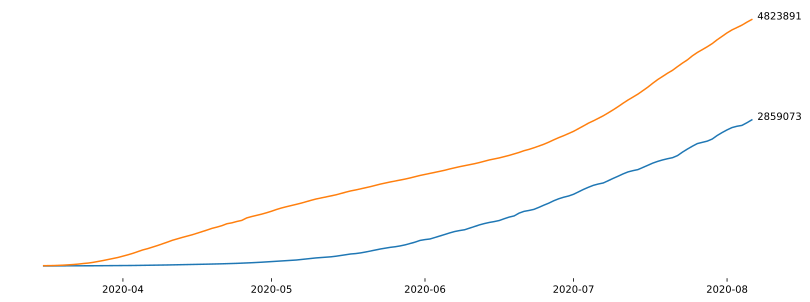

In [59]:
df_mundo_US = df_mundo[df_mundo.location == 'United States']
df_mundo_brazil = df_mundo[df_mundo.location == 'Brazil']

#valor = df_mundo_US.tail(1).total_cases.to_string(index=False).strip()[:-2]

fig, ax = plt.subplots(figsize = (14,5))
# plt.plot('date', 'total_cases', data=df_mundo_mundo)
reta_bra = plt.plot('date', 'total_cases', data=df_mundo_brazil[df_mundo_brazil.date > comeco])
reta_US = plt.plot('date', 'total_cases', data=df_mundo_US[df_mundo_US.date > comeco])

for valor in (df_mundo_brazil, df_mundo_US):
  plt.annotate('{}'.format(valor.tail(1).total_cases.to_string(index=False).strip()[:-2]), 
               xy=(1, valor.tail(1).total_cases), xytext=(-30, 0), 
               xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.gca().axes.get_yaxis().set_visible(False)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

### Q . Quais são os países com maior registros de casos de Covid no mundo?

In [38]:
data = '2020-08-06'
plt.rcParams['font.family'] = 'sans-serif'

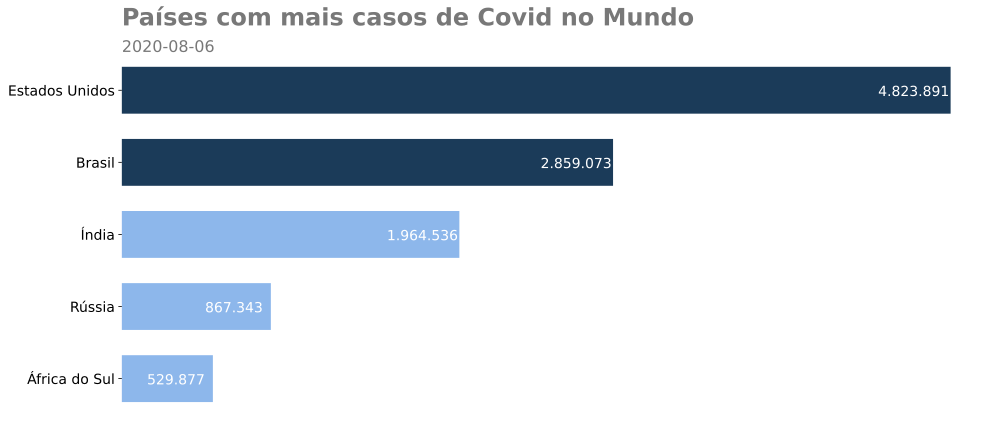

In [40]:
paises_total_casos = df_mundo.loc[df_mundo.date == data].sort_values(by='total_cases', ascending=False)[['location','total_cases']][1:6]
labels_traduzidos = ['','África do Sul', 'Rússia', 'Índia', 'Brasil', 'Estados Unidos']

x = np.arange(len(labels_traduzidos[1:6]))
width_bar = 0.65

cores = ["#8db7eb", "#8db7eb", "#8db7eb", '#1B3B59', '#1B3B59']

fig, ax = plt.subplots(figsize = (14,6))
g = ax.barh(x, paises_total_casos.total_cases.sort_values(), width_bar, color=cores)

plt.gca().axes.get_xaxis().set_visible(False)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

labels_qnt = paises_total_casos.total_cases

for rect in g:
    height = rect.get_height()
    ax.annotate(
                '{:,.0f}'.format(rect.get_width()).replace(',', '.'),
                xy=(rect.get_x() + rect.get_width(), rect.get_y() + width_bar/2 -0.12),
                xytext=(-37, 0),  # offset
                textcoords="offset points",
                ha='center',
                va='bottom',
                fontsize=14,
                color="white",)

ax.set_yticklabels(labels_traduzidos, size=14)

plt.tick_params(
    axis='y',        
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=True) 

plt.text(0, 4.9, 'Países com mais casos de Covid no Mundo',
         fontsize=24, 
         color='#787878',
         weight='bold')
plt.text(0, 4.7,
         data,
         verticalalignment="top",
         fontsize=16,
         color='#787878')

# plotar o gráfico
fig.tight_layout()
plt.show();

### Q . Quais são os países com maior registros de mortes de Covid no Mundo?

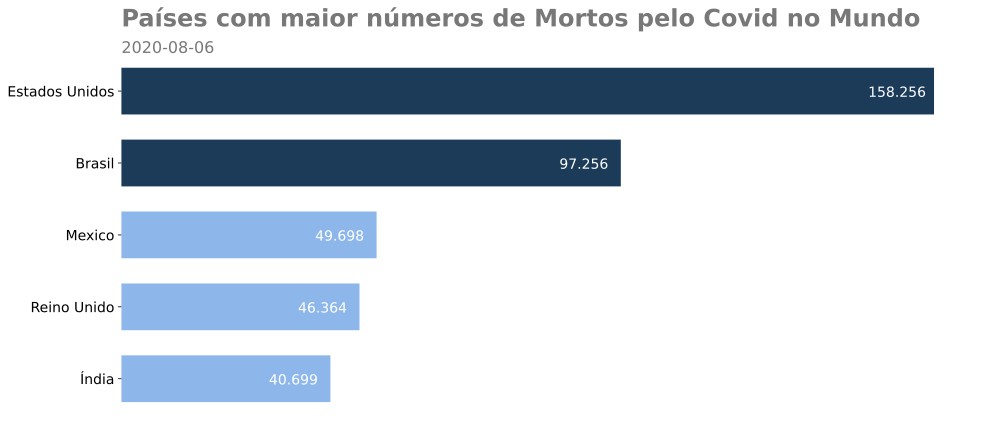

In [42]:
paises_total_mortes = df_mundo.loc[df_mundo.date == data].sort_values(by='total_deaths', ascending=False)[['location','total_deaths']][1:6]
labels_traduzidos = ['','Índia', 'Reino Unido', 'Mexico', 'Brasil', 'Estados Unidos']

x = np.arange(len(labels_traduzidos[1:6]))
width_bar = 0.65

cores = ["#8db7eb", "#8db7eb", "#8db7eb", '#1B3B59', '#1B3B59']

fig, ax = plt.subplots(figsize = (14,6))
g = ax.barh(x, paises_total_mortes.total_deaths.sort_values(), width_bar, color=cores)

plt.gca().axes.get_xaxis().set_visible(False)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# labels_qnt = paises_total_casos.total_cases

for rect in g:
    height = rect.get_height()
    ax.annotate(
                '{:,.0f}'.format(rect.get_width()).replace(',', '.'),
                xy=(rect.get_x() + rect.get_width(), rect.get_y() + width_bar/2 -0.12),
                xytext=(-37, 0),  # offset
                textcoords="offset points",
                ha='center',
                va='bottom',
                fontsize=14,
                color="white",
                )

ax.set_yticklabels(labels_traduzidos, size=14)

plt.tick_params(
    axis='y',        
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=True) 

plt.text(0, 4.9, 'Países com maior números de Mortos pelo Covid no Mundo',
         fontsize=24, 
         color='#787878',
         weight='bold')

plt.text(0, 4.7,
         data,
         verticalalignment="top",
         fontsize=16,
         color='#787878')

# plotar o gráfico
fig.tight_layout()
plt.show();